In [35]:
from __future__ import division

import sys
import time
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import igraph as ig

# our code
sys.path.append('/Users/iaincarmichael/Dropbox/Research/law/law-net/code')
from load_data import load_and_clean_graph, case_info

from make_snapshots import *
from make_edge_df import *
from attachment_model_inference import *
from compute_ranking_metrics import *

# directory set up
top_directory = '/Users/iaincarmichael/Dropbox/Research/law/law-net/'
data_dir = top_directory + 'data/'
experiment_data_dir = top_directory + 'explore/vertex_metrics_experiment/experiment_data/'

court_name = 'scotus'

# jupyter notebook settings
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# This def is not required, I just used it to make excuted code concise
def load_and_clean_graph(data_dir, court_name):
    G = load_citation_network_igraph(data_dir, court_name)
    all_edges = G.get_edgelist() # list of tuples
    bad_edges = []
    for edge in all_edges:
        citing_year = G.vs(edge[0])['year'][0]
        cited_year = G.vs(edge[1])['year'][0]
    
        if citing_year < cited_year:
            bad_edges.append(edge)

    G.delete_edges(bad_edges)
    return G

In [5]:
G = load_and_clean_graph()

0 seconds for 250465 edges


# make snapshot data frames

In [6]:
years = [year for year in range(1760, 2021) if year % 10 == 0]
metrics = ['indegree','pagerank']

In [ ]:

start = time.time()
get_snapshot_vertex_metrics(G, years, metrics, experiment_data_dir = experiment_data_dir)
runtime = time.time() - start
print runtime

# Make edge data frame

In [7]:
year_interval = 10
num_non_edges_to_add = len(G.get_edgelist())

In [14]:
start = time.time()
get_snapshot_edge_metrics(G, experiment_data_dir, year_interval, num_non_edges_to_add)
runtime = time.time() - start
print runtime

669.422421932


In [15]:
edge_df = pd.read_csv(experiment_data_dir + 'edge_data.csv', index_col=0)


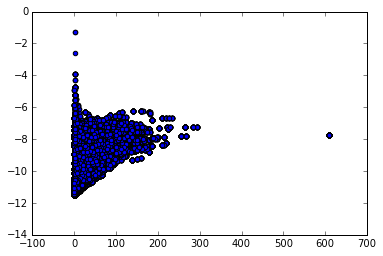

In [28]:
plt.scatter(edge_df['indegree'],
            np.log(edge_df['pagerank']))

In [33]:
columns_to_use = ['indegree','pagerank']

start = time.time()
LogReg = fit_logistic_regression(experiment_data_dir, columns_to_use)
runtime = time.time() - start
print runtime

3.50401616096


# compute vertex metrics

In [34]:
year_interval = 10
R = 500

In [40]:
start = time.time()
ranking_metrics = compute_ranking_metrics(G, LogReg, columns_to_use, experiment_data_dir, year_interval, R)
runtime = time.time() - start
print runtime

12.3361809254


In [41]:
ranking_metrics

7.4420000000000002